In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "CA-CondMat.txt"
G = nx.read_edgelist(file_path, nodetype=int)

# Basic network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)
print(f"Number of nodes in the largest connected component: {subgraph.number_of_nodes()}")
print(f"Number of edges in the largest connected component: {subgraph.number_of_edges()}")

# Average clustering coefficient
avg_clustering_coeff = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering_coeff}")

# Number of triangles
triangles = sum(nx.triangles(G).values()) // 3
print(f"Number of triangles: {triangles}")

# # Diameter and effective diameter
# diameter = nx.diameter(subgraph)
# print(f"Diameter of the largest connected component: {diameter}")

# # 90-percentile effective diameter
# effective_diameter = nx.effective_diameter(subgraph)
# print(f"90-percentile effective diameter: {effective_diameter}")

Number of nodes: 23133
Number of edges: 93497
Number of nodes in the largest connected component: 21363
Number of edges in the largest connected component: 91342
Average clustering coefficient: 0.6334130270820653
Number of triangles: 173361


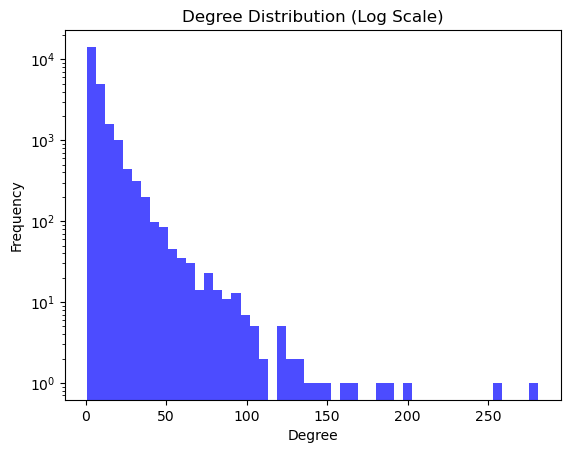

Maximum degree: 281
Minimum degree: 1
Average degree: 8.083430596982666
Standard deviation of degree distribution: 10.645189586789236


In [72]:
# Degree distribution
degrees = [degree for node, degree in G.degree()]
max_degree = max(degrees)
min_degree = min(degrees)
avg_degree = np.mean(degrees)
std_degree = np.std(degrees)

# Plot degree distribution
plt.hist(degrees, bins=50, log=True, color='blue', alpha=0.7)
plt.title("Degree Distribution (Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")
print(f"Average degree: {avg_degree}")
print(f"Standard deviation of degree distribution: {std_degree}")

In [16]:
G = nx.read_edgelist(file_path, nodetype=int)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
katz_centrality = nx.katz_centrality(G, alpha=0.01, beta=1.0, max_iter=1000)
pagerank_centrality = nx.pagerank(G, alpha=0.85)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Clustering coefficients
local_clustering_coefficients = nx.clustering(G)
global_clustering_coefficient = nx.average_clustering(G)
avg_local_clustering_coefficient = np.mean(list(local_clustering_coefficients.values()))

# Function to get top 10 nodes for a centrality measure
def get_top_10(centrality_dict, measure_name):
    sorted_centrality = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    top_10 = sorted_centrality[:10]
    return pd.DataFrame(top_10, columns=["Node", measure_name])

In [46]:
# Get top 10 nodes for each centrality measure
top_10_degree = get_top_10(degree_centrality, "Degree Centrality")
top_10_eigenvector = get_top_10(eigenvector_centrality, "Eigenvector Centrality")
top_10_katz = get_top_10(katz_centrality, "Katz Centrality")
top_10_pagerank = get_top_10(pagerank_centrality, "PageRank Centrality")
top_10_betweenness = get_top_10(betweenness_centrality, "Betweenness Centrality")
top_10_closeness = get_top_10(closeness_centrality, "Closeness Centrality")
top_10_local_clustering = get_top_10(local_clustering_coefficients, "Local Clustering Coefficient")

In [50]:
# Display top 10 tables
print("Top 10 Nodes for Degree Centrality:")
print(top_10_degree)

print("\nTop 10 Nodes for Eigenvector Centrality:")
print(top_10_eigenvector)

print("\nTop 10 Nodes for Katz Centrality:")
print(top_10_katz)

print("\nTop 10 Nodes for PageRank Centrality:")
print(top_10_pagerank)

print("\nTop 10 Nodes for Betweenness Centrality:")
print(top_10_betweenness)

print("\nTop 10 Nodes for Closeness Centrality:")
print(top_10_closeness)

print("\nTop 10 Nodes for Local Clustering Coefficient:")
print(top_10_local_clustering)

Top 10 Nodes for Degree Centrality:
     Node  Degree Centrality
0   73647           0.012148
1   52658           0.010980
2   78667           0.008689
3   97632           0.008214
4   22987           0.007868
5  101425           0.007219
6   97788           0.006830
7   15439           0.006398
8   46269           0.006139
9   45942           0.006052

Top 10 Nodes for Eigenvector Centrality:
    Node  Eigenvector Centrality
0  22987                0.224976
1  97632                0.217068
2  87484                0.166880
3  52658                0.163823
4  45810                0.138883
5  64428                0.138137
6  25209                0.115676
7  95940                0.113887
8  80199                0.113190
9  18871                0.106227

Top 10 Nodes for Katz Centrality:
     Node  Katz Centrality
0   52658         0.029197
1   73647         0.029050
2   97632         0.024385
3   22987         0.023699
4   78667         0.023367
5  101425         0.020444
6   15439       

In [70]:
# Check if the graph is directed
if nx.is_directed(G):
    print("The graph is directed.")
    reciprocity = nx.reciprocity(G)
else:
    print("The graph is undirected.")
    reciprocity = 1.0  # Undirected graphs have reciprocity = 1.0

# Transitivity
transitivity = nx.transitivity(G)

# Print results
print(f"Reciprocity: {reciprocity}")
print(f"Transitivity: {transitivity}")

# Print global and average local clustering coefficients
print(f"\nGlobal Clustering Coefficient: {global_clustering_coefficient}")
print(f"Average Local Clustering Coefficient: {avg_local_clustering_coefficient}")

The graph is undirected.
Reciprocity: 1.0
Transitivity: 0.2643168246385282

Global Clustering Coefficient: 0.6334130270820653
Average Local Clustering Coefficient: 0.6334130270820653


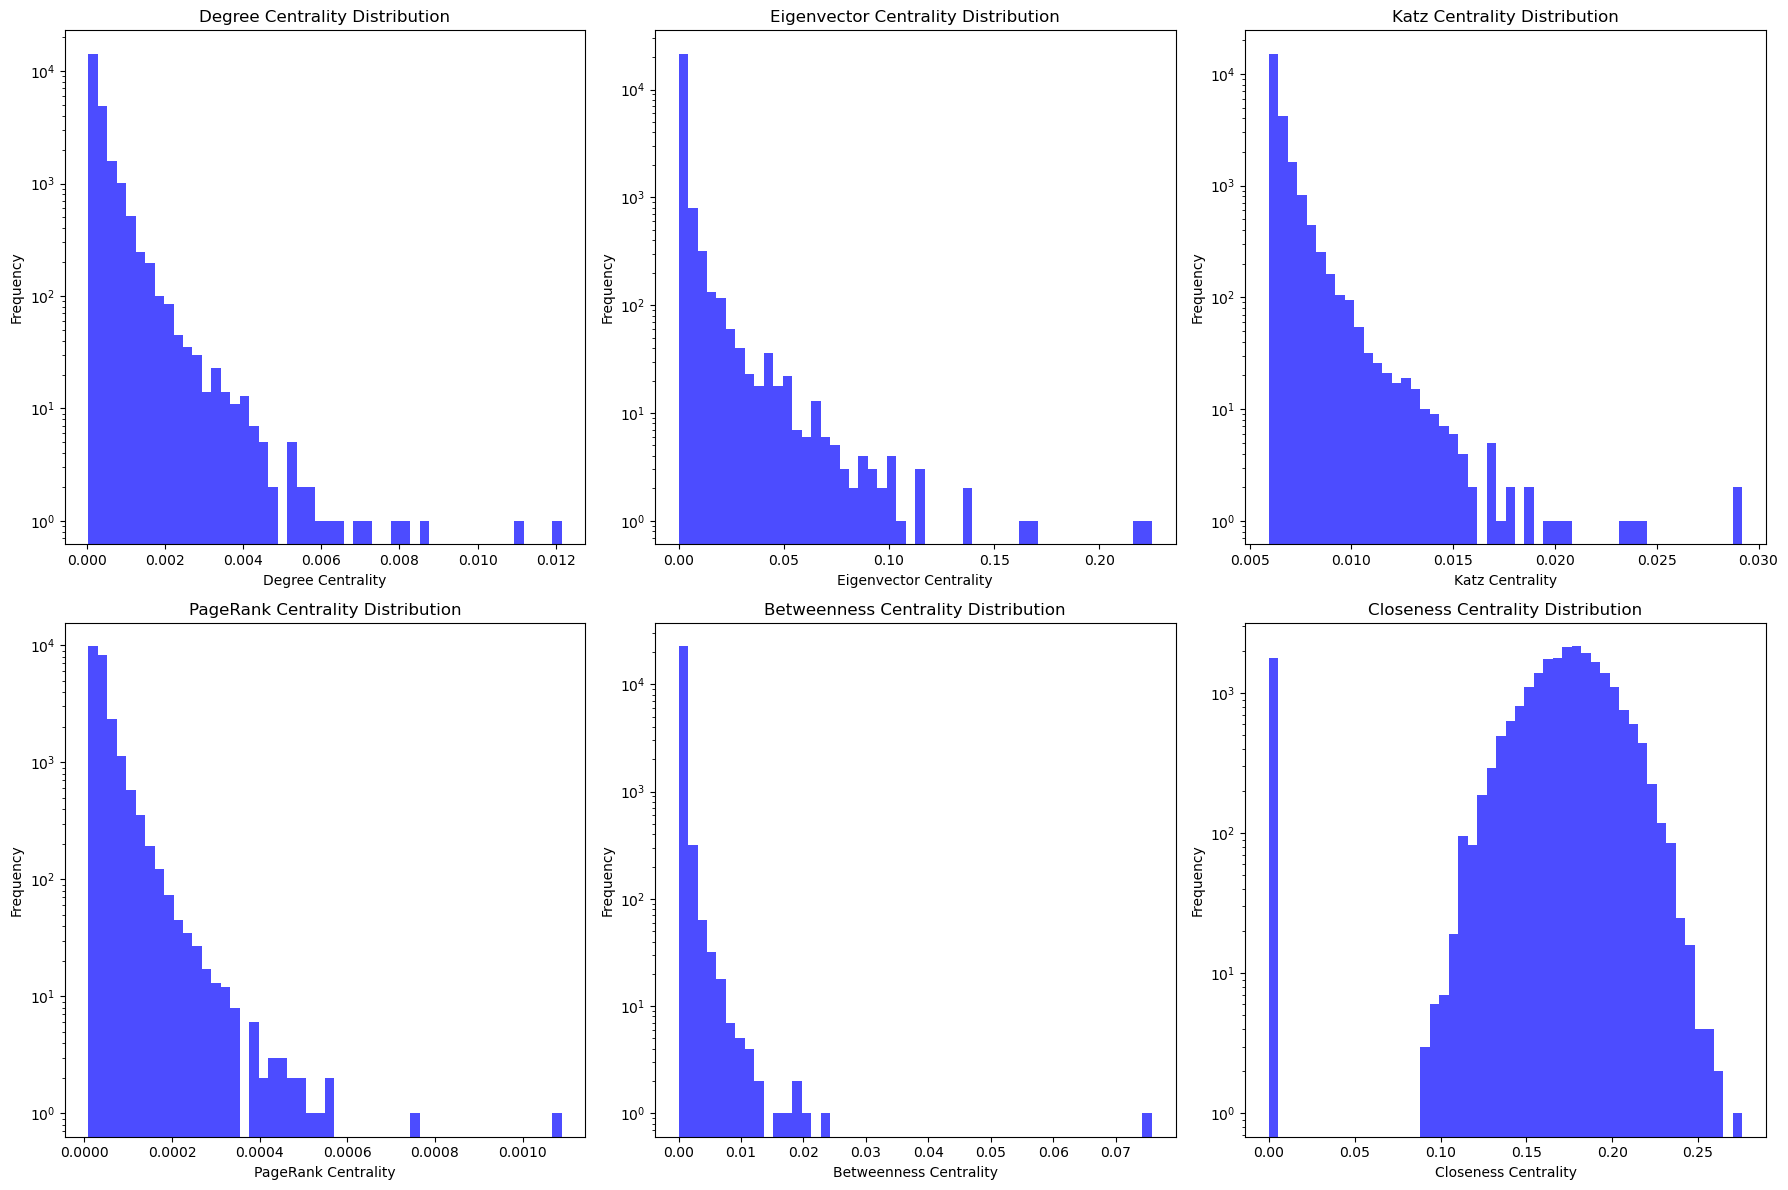

In [74]:
# Visualize centrality distributions
plt.figure(figsize=(18, 12))

# Degree Centrality
plt.subplot(2, 3, 1)
plt.hist(list(degree_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")

# Eigenvector Centrality
plt.subplot(2, 3, 2)
plt.hist(list(eigenvector_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Eigenvector Centrality Distribution")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")

# Katz Centrality
plt.subplot(2, 3, 3)
plt.hist(list(katz_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Katz Centrality Distribution")
plt.xlabel("Katz Centrality")
plt.ylabel("Frequency")

# PageRank Centrality
plt.subplot(2, 3, 4)
plt.hist(list(pagerank_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("PageRank Centrality Distribution")
plt.xlabel("PageRank Centrality")
plt.ylabel("Frequency")

# Betweenness Centrality
plt.subplot(2, 3, 5)
plt.hist(list(betweenness_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")

# Closeness Centrality
plt.subplot(2, 3, 6)
plt.hist(list(closeness_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

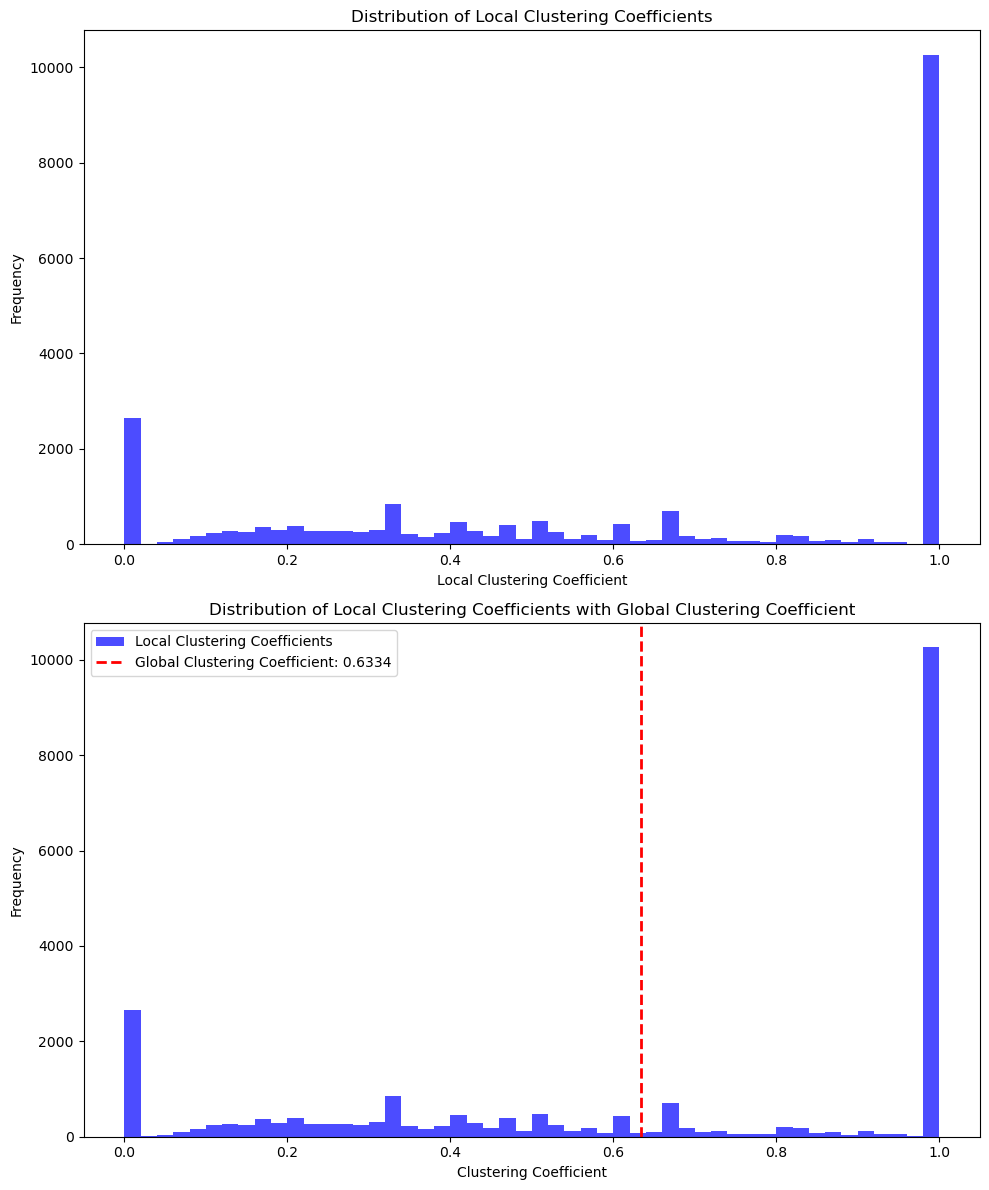

In [84]:
# Create a figure with 2 rows and 1 column
plt.figure(figsize=(10, 12))

# First subplot: Distribution of local clustering coefficients
plt.subplot(2, 1, 1)
plt.hist(list(local_clustering_coefficients.values()), bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Local Clustering Coefficients")
plt.xlabel("Local Clustering Coefficient")
plt.ylabel("Frequency")

# Second subplot: Distribution of local clustering coefficients with global clustering coefficient
plt.subplot(2, 1, 2)
plt.hist(list(local_clustering_coefficients.values()), bins=50, color='blue', alpha=0.7, label="Local Clustering Coefficients")
plt.axvline(global_clustering_coefficient, color='red', linestyle='dashed', linewidth=2, label=f"Global Clustering Coefficient: {global_clustering_coefficient:.4f}")
plt.title("Distribution of Local Clustering Coefficients with Global Clustering Coefficient")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()